# Project Overview

In a short paragragh describe the problem you want to explore use data science techniques

Nepal has been one of the highest contributor of labor market to countries Arabic countries like UAE, Qatar, and Malaysia. Most of the youths, when they grow up  aspire to work in these countries as soon as they meet the age barrier to go for foreign employment. This has established as a minor culture which is causing gender based population imbalance in Nepal.

Population census is done with respect to all the people that are inside the country, and it does not consider its own citizens if they are not inside the country during census. This goes for similar population related data collection. When we were casually exploring the population information of some countries, we were surprised to find a very weird pattern for Nepal. For all other age groups except the working age population, the number of male and female population were similar but for the working age population, there was a huge difference in male and female population. So, the purpose of this study is to see whether the observed differece was just a random occurance or it has some external influence.

# Problem Description
In one sentence describe the problem you want to explore with data science

In this study, we are going to see if the male and female population disparity in Nepalese youth population is a random occurance or it is a result of some external factor, possibly the male labor migration to foreign countries.

# Subject Matter Expertise

In bulleted format, describe the subject matters that will help you explore your topic. Example:
 
1. Data Analysis
2. Data Visualization
3. Statistics and Probability
4. Hypothesis Testing
5. Linear Regression

1. Data Analysis: There is not much data analysis involved except the calculation of the difference in male and female working age population. The data quality is good without any NaN values so that even filtering need not be done, and we are using a fairly small portion of the data pertinent to us from all the data we have.

2. Data Visualization: We visualize the male and female population for different age groups using bar chart to show how the diffenrence compares to each age group. Furthermore, we use a pie chart to show the male and female population portions in Nepal. We use a histogram to show the result of 1000 simulations for male and female populations in Nepal.

3. Statistics and Probability: We state the general probabilities but use the global human sex ratio for our simulation. We calculate esome staistics like mean, median, mode, standard deviation, and variance of the whole data which will not be very useful to use. But we also calculate these statistics for the data that is only pertinent to Nepal.

5. Hypothesis Testing: We use the data from these 1000 simulations to see how spread out the random model is and we will compare where the actual difference in male and female working age Nepalese population lies in this distribution. We also calculate the p-value and conclude based on this.

# Assumptions
List any assumptions you may have about the topic. 
`Assumptions are a thing that is accepted as true or as certain to happen, without proof.`


Two general assumptions are listed below:

1. Age group 20-39 is taken as the working age population as Nepali government only allows people of around this age group for migration to other countriese in labor intensive jobs.

2. The bigger assumption is that male are more likely to go for foreign employment purely based on the knowledge of Nepal social structure and culture.

# Steps to Explore the Topic and Problem

List the steps you're going to take to explore the topic using the data sources you identify and the techniques you already know. Please list them as step 1, step 2, step 3. Example:

1. Download data from Kaggle of gender based population for all geographical locations in the world.
2. Visualize the data and filter if any anomalies.
3. Calcualte some data statistics like mean, median, mode, standard deviation, and variance from the data and visualize them for insights.
4. Sampling of the total population data. Visualize using histogram.
5. Set expected probability distribution and make large simulations.
6. Visualize the simulation result in a histogram.
7. Calculate the p-value based on the distribution in histogram.
8. Use the p-value and the place of actual Nepalese working age male and female population difference in the histogram to make a conclusion of the study.

# Data Sources:

In bulleted format, list where you will get data from. Data sources must include one existing data source and web-scrapted source. Example:

1. Kaggle World Population by Age Group 2020 "https://www.kaggle.com/alizahidraja/world-population-by-age-group-2020"

# Data Exploration
Describe the data using what you know. For larger datasets may have to pull out columns that are of interst to you.

In [3]:
# imports
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from datascience.util import sample_proportions

In [83]:
world_population = pd.read_csv("WorldPopulationByAge2020.csv")
world_population.head(20)

,Location,AgeGrp,PopMale,PopFemale,PopTotal
0,Afghanistan,0-19,10709.0,10197.0,20906.0
1,Afghanistan,20-39,5994.0,5574.0,11568.0
2,Afghanistan,40-59,2485.0,2316.0,4801.0
3,Afghanistan,60+,781.0,858.0,1639.0
4,Africa,0-19,344109.0,334982.0,679091.0
5,Africa,20-39,197448.0,197144.0,394592.0
6,Africa,40-59,94547.0,98460.0,193007.0
7,Africa,60+,33767.0,40123.0,73890.0
8,African Group,0-19,343795.0,334677.0,678472.0
9,African Group,20-39,197193.0,196889.0,394082.0


# Data Cleaning
Show techniques you use to reduce impact of outliers, drop missing, or null values (if any)

In [25]:
print("Location Nan values count:", world_population["Location"].isna().sum())
print("Age Group Nan values count:", world_population["AgeGrp"].isna().sum())
print("Male Population Nan values count:", world_population["PopMale"].isna().sum())
print("Female Population Nan values count:", world_population["PopFemale"].isna().sum())
print("Total Population Nan values count:", world_population["PopTotal"].isna().sum())

Location Nan values count: 0
Age Group Nan values count: 0
Male Population Nan values count: 0
Female Population Nan values count: 0
Total Population Nan values count: 0


As we can see above, we have no NaN values in the dataframe, so we do not need to filter anything. Another thing that we can see in the dataframe is "Africa" which is not necesarily a country. The column header is not country but location, so the dataframe consists of data for countries, continents, and other kinds of geeographical areas. It is not neecessary to filter those as we will be selecting only the values that we need and not be concerned with the values we do not need.

# Describe the Data Using Descriptive Stats
Use descriptive stats to tell us about your data. Must include mean, median, and mode where applicable. Also must talk about normality of data.

Remember what `standard deviation`, `mean`, `central tendency`, and `variance` mean for your data

In [32]:
def print_descriptive_stats(column):
    print("For column ", column)
    print("Mean", world_population[column].mean())
    print("Median", world_population[column].median())
    print("Mode", world_population[column].mode())
    print("Standard Deviation", world_population[column].std())
    print("Variance", world_population[column].var())
    print()

print_descriptive_stats("PopMale")
print_descriptive_stats("PopFemale")
print_descriptive_stats("PopTotal")

For column  PopMale
Mean 88324.34431818181
Median 8066.0
Mode 0    12.0
1    16.0
2    23.0
3    36.0
dtype: float64
Standard Deviation 195822.10023695984
Variance 38346294941.21395

For column  PopFemale
Mean 86534.43863636363
Median 8187.5
Mode 0    12.0
dtype: float64
Standard Deviation 187027.9601316678
Variance 34979457871.01272

For column  PopTotal
Mean 174858.78295454546
Median 16211.0
Mode 0    32.0
dtype: float64
Standard Deviation 382681.6110750213
Variance 146445215454.97388



The above descriptive statistics do not really mean anything for us because of our purpose and because of the structure of the dataframe. The location is arbitrary and it is not useful to invest time in filtering just the locations that we need when we can easily select the data that we need. 

We are concerning ourselves with only the data from Nepal, so lets find out the population for male, female, and total population for all four age groups of Nepal.





In [45]:
import statistics

# Get actual values of male and female population
def get_male_female_pop(location, age_group):
    male_pop = world_population.loc[(world_population["Location"] == location) & (world_population["AgeGrp"] == age_group), "PopMale"]
    female_pop = world_population.loc[(world_population["Location"] == location) & (world_population["AgeGrp"] == age_group), "PopFemale"]
    return (male_pop, female_pop)

nepal_age_0_19_male, nepal_age_0_19_female = get_male_female_pop("Nepal", "0-19")
nepal_age_20_39_male, nepal_age_20_39_female = get_male_female_pop("Nepal", "20-39")
nepal_age_40_59_male, nepal_age_40_59_female = get_male_female_pop("Nepal", "40-59")
nepal_age_60_plus_male, nepal_age_60_plus_female = get_male_female_pop("Nepal", "60+")

nepal_male_pop = [nepal_age_0_19_male.iloc[0], nepal_age_20_39_male.iloc[0], nepal_age_40_59_male.iloc[0], nepal_age_60_plus_male.iloc[0]]
nepal_female_pop = [nepal_age_0_19_female.iloc[0], nepal_age_20_39_female.iloc[0], nepal_age_40_59_female.iloc[0], nepal_age_60_plus_female.iloc[0]]

print(nepal_male_pop)
print(nepal_female_pop)

nepal_total_male_pop = sum(nepal_male_pop)
nepal_total_female_pop = sum(nepal_female_pop)
nepal_total_population = nepal_total_male_pop + nepal_total_female_pop
nepal_male_portion = nepal_total_male_pop / nepal_total_population
nepal_female_portion = nepal_total_female_pop / nepal_total_population
print("Male:Female ratio in total Nepal population: " + str(nepal_male_portion) + ":" + str(nepal_female_portion) + "\n")

def print_descriptive_stats_nepal(nepal_male_pop, nepal_female_pop):
    print("For Nepal male population:")
    print("Mean: ", statistics.mean(nepal_male_pop))
    print("Median: ", statistics.median(nepal_male_pop))
    print("Standard Deviation: ", statistics.stdev(nepal_male_pop))
    print("Variance: ", statistics.variance(nepal_male_pop))
    print()

    print("For Nepal female population:")
    print("Mean: ", statistics.mean(nepal_female_pop))
    print("Median: ", statistics.median(nepal_female_pop))
    print("Standard Deviation: ", statistics.stdev(nepal_female_pop))
    print("Variance: ", statistics.variance(nepal_female_pop))

print_descriptive_stats_nepal(nepal_male_pop, nepal_female_pop)

[5848.0, 4050.0, 2291.0, 1149.0]
[5732.0, 5626.0, 3058.0, 1365.0]
Male:Female ratio in total Nepal population: 0.45805144407431575:0.5419485559256842

For Nepal male population:
Mean:  3334.5
Median:  3170.5
Standard Deviation:  2057.095444228747
Variance:  4231641.666666667

For Nepal female population:
Mean:  3945.25
Median:  4342.0
Standard Deviation:  2118.356182672467
Variance:  4487432.916666667


# Data Visualization Continued
Use everything from the miniproject 1 to describe the plots you will use to visualize you data. 

Must use histogram, bar charts, and pie charts to describe aspects about the data

Determine if your data is normal or not!



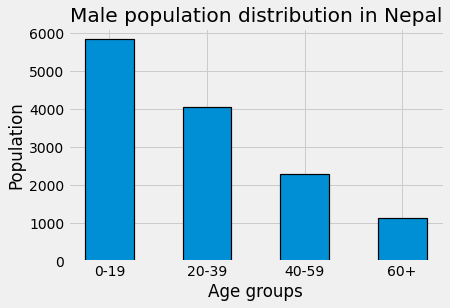

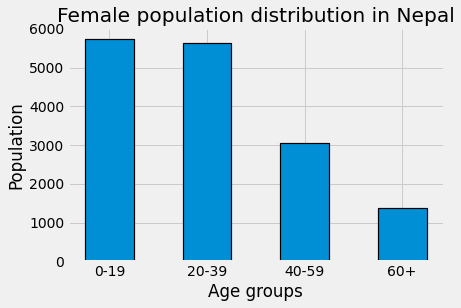

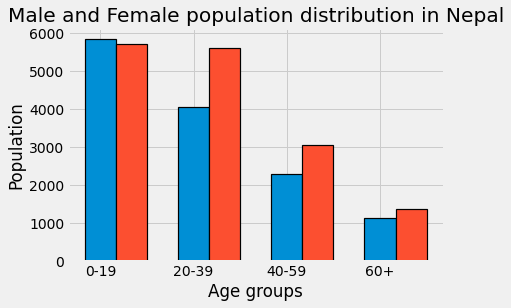

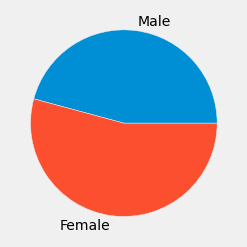

In [61]:
age_groups = ["0-19", "20-39", "40-59", "60+" ]

def visualize_bar(pop_by_age_group, age_groups, title):
    plt.bar([5, 15, 25, 35], pop_by_age_group, width=5 , edgecolor="black", linewidth=1.2)
    plt.title(title)
    plt.xlabel("Age groups")
    plt.ylabel("Population")
    plt.xticks(range(5, 40, 10), age_groups)
    plt.show()

def visualize_bar_male_female(male_pop_by_age, female_pop_by_age, age_groups, title):
    x1 = [x for x in range(5, 55, 15)]
    x2 = [x+5 for x in x1]
    plt.bar(x1, male_pop_by_age, width=5, edgecolor="black", linewidth=1.2, label="Male")
    plt.bar(x2, female_pop_by_age, width=5, edgecolor="black", linewidth=1.2, label="Female")
    plt.title(title)
    plt.xlabel("Age groups")
    plt.ylabel("Population")
    plt.xticks(range(5, 55, 15), age_groups)
    plt.show()

def visualize_pie(male_portion, female_portion):
    labels = ["Male", "Female"]
    sizes = [nepal_male_portion * 100, nepal_female_portion * 100]
    plt.pie(sizes, labels=labels)
    plt.show()

visualize_bar(nepal_male_pop, age_groups, "Male population distribution in Nepal")

visualize_bar(nepal_female_pop, age_groups, "Female population distribution in Nepal")

visualize_bar_male_female(nepal_male_pop, nepal_female_pop, age_groups, "Male and Female population distribution in Nepal")

visualize_pie(nepal_male_portion, nepal_female_portion)



In the third bar chart, we can see that the difference in male and female population is sizable for age group 20-39 compared to other age  groups. This difference decreases in age groups 40-59 and 60+. It is also important to note that the  differeence is not very significant in age group 0-19.

## Data Sampling

Draw random some samples from your dataset(s)
(If you joined your dataset into one large dataset, only sample randomly from this large dataset)

You must describe how you choose to pick the random samples, i.e. systematic, probablistic sampling

You must describe if you draw random samples with or without replacement

Describe why or why not you chose to randomly draw samples with replacement or without replacement

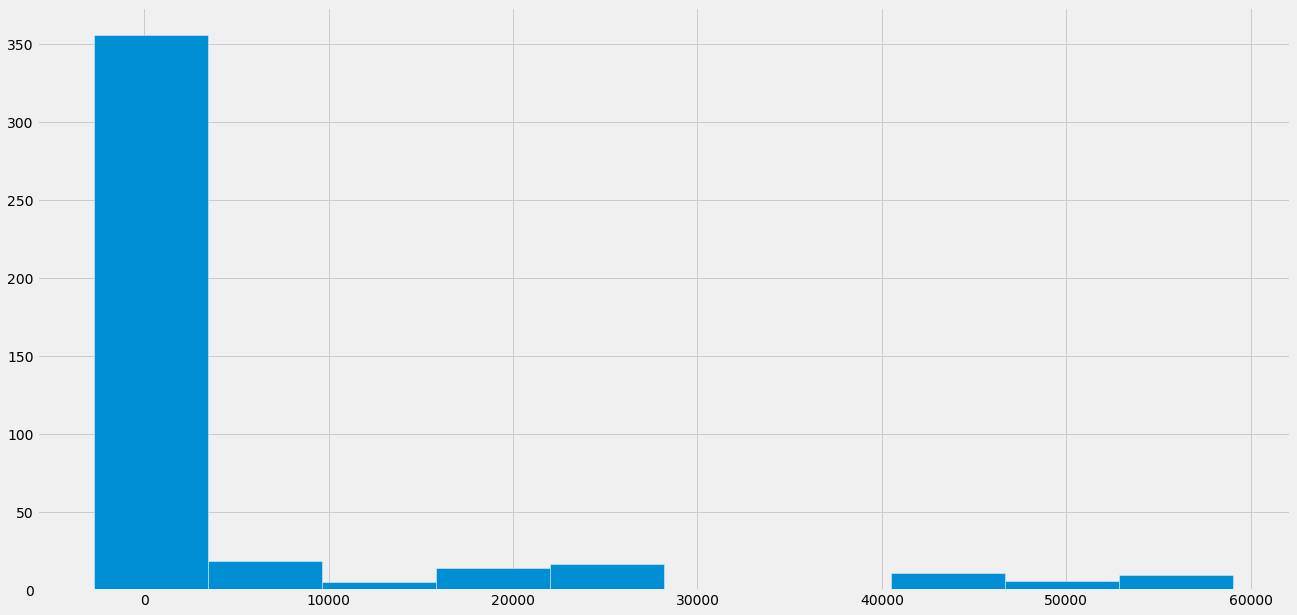

In [78]:
male_working_age = world_population.loc[world_population["AgeGrp"] == "20-39", "PopMale"]
male_working_age = male_working_age.tolist()

female_working_age = world_population.loc[world_population["AgeGrp"] == "20-39", "PopFemale"]
female_working_age = female_working_age.tolist()

male_female_diff_20_39 = []
for i in range(len(male_working_age)):
    male_female_diff_20_39.append(male_working_age[i] - female_working_age[i])

plt.figure(figsize=(20,10))
plt.hist(male_female_diff_20_39)
plt.show()

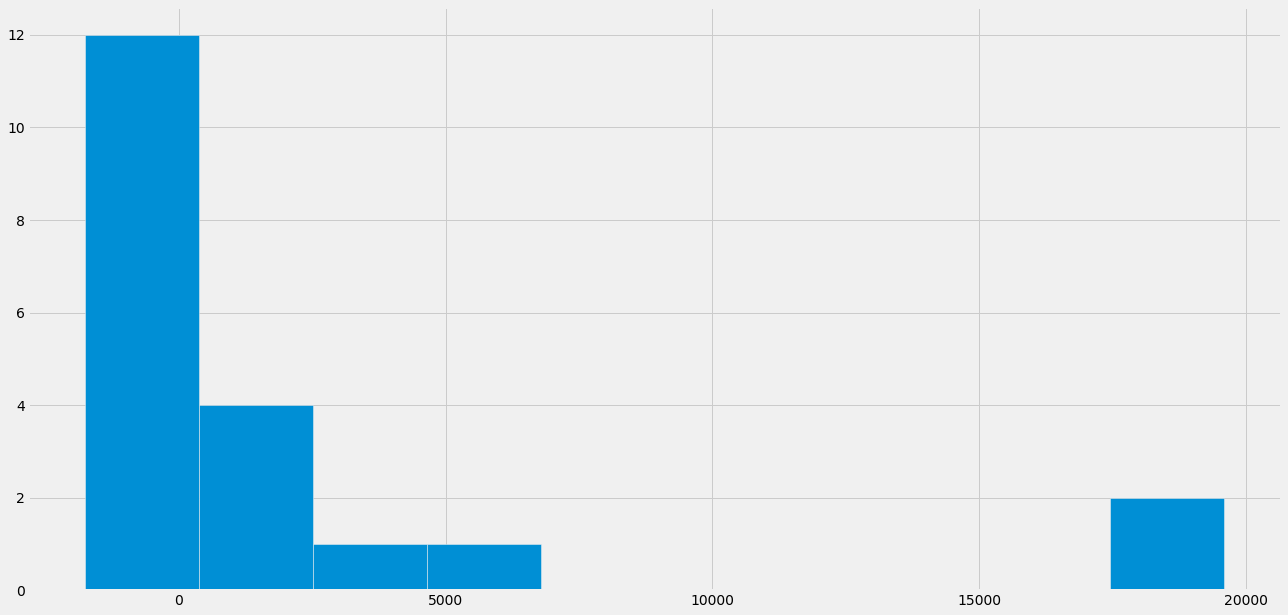

In [80]:
# Take a small sample
male_female_diff_20_39_sample_one = np.random.choice(male_female_diff_20_39, size=20, replace=True)
plt.figure(figsize=(20,10))
plt.hist(male_female_diff_20_39_sample_one)
plt.show()

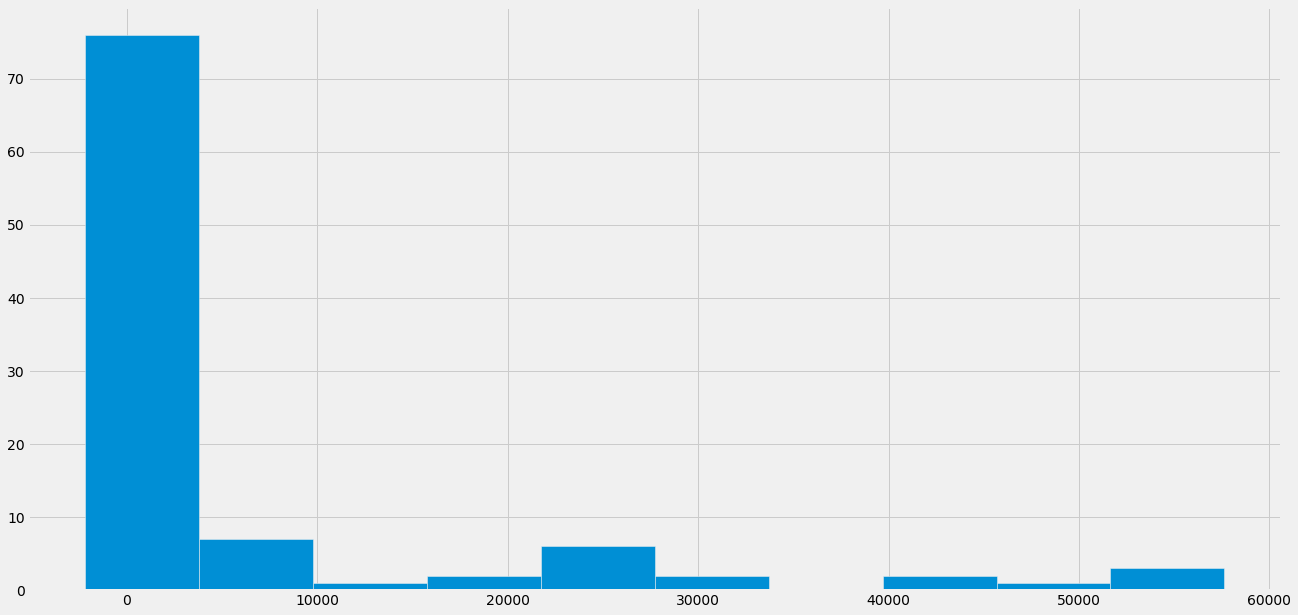

In [81]:
# Take another sample
male_female_diff_20_39_sample_two = np.random.choice(male_female_diff_20_39, size=100, replace=True)
plt.figure(figsize=(20,10))
plt.hist(male_female_diff_20_39_sample_two)
plt.show()

Taking the samples from the whole data is not really uselful in this study where we are focused on the difference in working age male and female population in Nepal. The data is not structured in  an easy way for us to explore with sampling. The dataset has information for locations and not countries. It has information for countries and other large geographical areas which will not give us any good conclusion from the measurement of difference in working age male and female population as these numbers will be large compared to others. 

We take random sampling because we do not know any structural organization of data. We do replace the selection because the data that we pick is mostly independent of others.


## Find Probability
Find the probability of two events that must both happen in your data analysis

Find the probablity of an event that doesn't happen using your dataset(s)

Find the probability of event that is equally likely occur. You might have to think about this in regards to your problem that you are exploring



In [84]:
probability_man = 0.5
probability_woman = 0.5

probability_man_and_woman = 0
probability_not_man_not_woman = 0


Even though these are the theoritical probabilities, we are going to use global human sex ratio as expected distribution as we are trying to see how different the difference in male and female population is compared to the general the rest of the world.

The human sex ration is 101:100.

In [86]:
male_female_expected_distribution = [0.505, 0.495]

## Testing Hypotheses

Choose two hypotheses you want to explore in regards to your topic.
Examples:
The state of Montana likes cheesecake as a desert?
Have the demographics of Washington, DC decreased over the past decade?
United States streaming services mainly stream rap or hip/hop?

### Note: Make sure to note the Null and the alternative hypotheses for each of the questions you want to test

Null Hypothesis: The difference in male and female population of Nepal is just a chance and there is no variable contributing to this.

Alternative Hypothesis: The difference in male and female population of Nepal is not just a change and there is some extenal factor resulting in the difference, possibly the mass migration of working age males to Arabic countries for occupation.


## Test Statistics 
For each of your questions list the test statistic that you are going to use to test the hypothesis.

In [ ]:
We are going to use the variable 'difference in male and female population' as the test statistic as it takes into account the disparity we are concerned about.

## Observed Values
Show the oberved value of the test statistics

In [89]:
# Do on simulation
def get_one_simulation(location, age_group, population_type):
    total_pop = world_population.loc[(world_population["Location"] == location) & (world_population["AgeGrp"] == age_group), population_type]
    one_sample = sample_proportions(total_pop.iloc[0] , male_female_expected_distribution)
    one_sample_male_female_diff = (one_sample[0] - one_sample[1]) * total_pop.iloc[0]
    return one_sample_male_female_diff

print(get_one_simulation("Nepal", "20-39", "PopTotal"))

99.99999999999994


In [90]:
# Do 1000 simulations
male_female_pop_diffs = []

for i in range(0,1000):
    one_sample = get_one_simulation("Nepal", "20-39", "PopTotal")
    male_female_pop_diffs.append(one_sample)

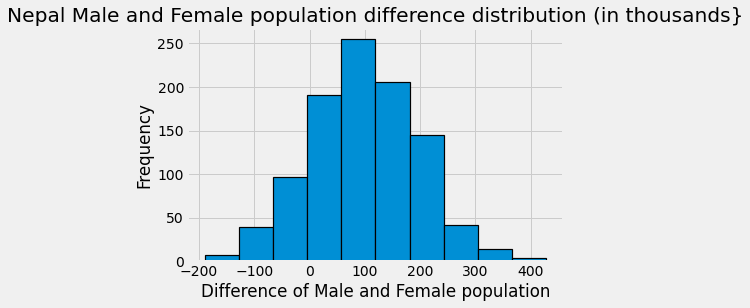

In [92]:
# Draw histogram from the distribution

def plot_histogram_all_simulations(male_female_pop_diff, title):
    plt.hist(male_female_pop_diffs, edgecolor="black", linewidth=1.2)
    plt.title(title)
    plt.xlabel("Difference of Male and Female population")
    plt.ylabel("Frequency")
    plt.show()

plot_histogram_all_simulations(male_female_pop_diffs, "Nepal Male and Female population difference distribution (in thousands}")

In [94]:
# Print the actual difference in the male and female population of Nepal
print(nepal_total_male_pop - nepal_total_female_pop)

-2443.0


# Hypothesis Tests Conclusions
Based on what you found about your topic communicate it to the audience. 

In [ ]:
# Find the p-value
p-value = 0

The p-value is 0 because the  actual difference in the male and female population is way off in the left than the lowest value in the histogram. A p-value of less than 5 is generally considered to disprove the random model which is what the null hypothesis supports.

# Topic Conclusions
Sum up the conclusions about what you did and why it is interesting to you, the public reading your analysis or to a particular population

In [ ]:
We coonclude that the differnece in the working age male and female population of Nepal is not just an occurance by chance and that it has some external cause. The possible cause massive immigration to countries like UAE, Malaysia, and Qatar for foreign employment of young male population. However, this is beyond the purpose of the study. It will be really interesting to see the economic and demographic implications of this huge imblance in working age male and female population.